# Netflix Data Analysis Project

## Objective
To analyze Netflix's content distribution, growth trends, and genre patterns using Python and Pandas.

## Tools Used
- Python
- Pandas
- Matplotlib
- Jupyter Notebook

## Data Loading
The dataset was loaded and inspected for structure and completeness.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\netflix\netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [8]:
df.duplicated().sum()


np.int64(0)

## Data Cleaning
- Handled missing values
- Removed duplicates
- Converted date_added to datetime
- Created new feature: year_added

In [9]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

In [10]:
df.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [11]:
df.dropna(subset=['date_added'], inplace=True)

In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
df.dropna(subset=['rating', 'duration'], inplace=True)

In [14]:
df.isnull().sum()



show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df.shape

(8790, 12)

In [16]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

## 1. Movies vs TV Shows Distribution

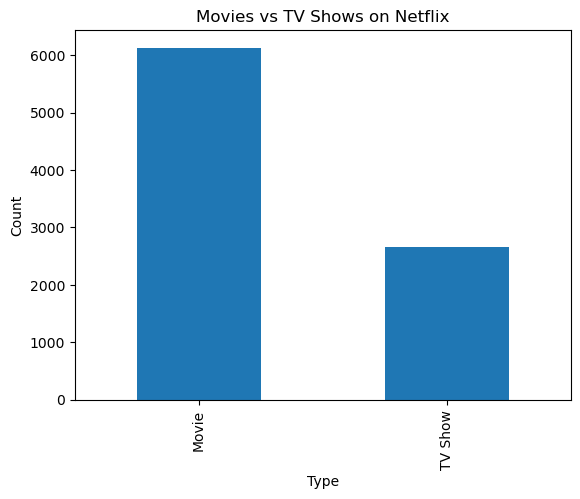

In [17]:
df['type'].value_counts().plot(kind='bar')

plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## 2. Content Growth Over Time

In [19]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
df['date_added'] = df['date_added'].str.strip()

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [23]:
df['date_added'].isnull().sum()

np.int64(0)

In [24]:
df['year_added'] = df['date_added'].dt.year

In [25]:
df['year_added'].value_counts().sort_index()

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

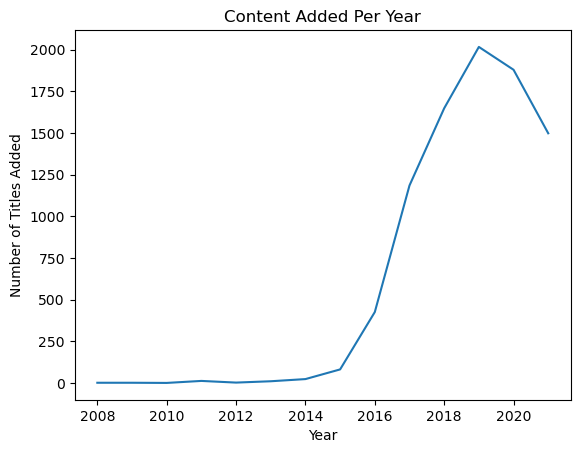

In [26]:
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()


## 3. Top Producing Countries

In [27]:
df['country'].value_counts().head(10)


country
United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [28]:
df[df['country'] != "Unknown"]['country'].value_counts().head(10)

country
United States     2809
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

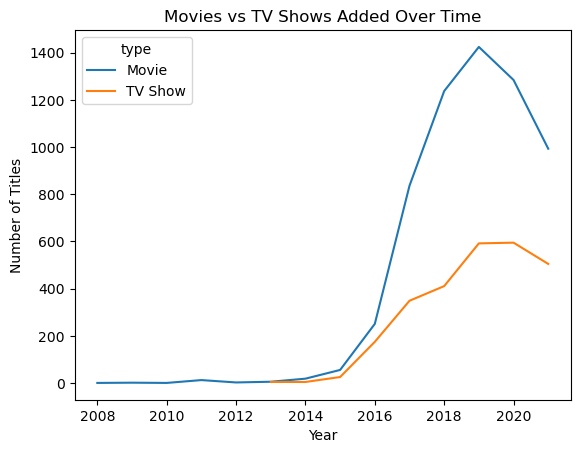

In [29]:
df.groupby(['year_added', 'type']).size().unstack().plot(kind='line')

plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

## 4. Genre Analysis

In [30]:
df['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [31]:
df['listed_in'] = df['listed_in'].str.split(', ')

In [32]:
df_genre = df.explode('listed_in')

In [33]:
df_genre['listed_in'].value_counts().head(10)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

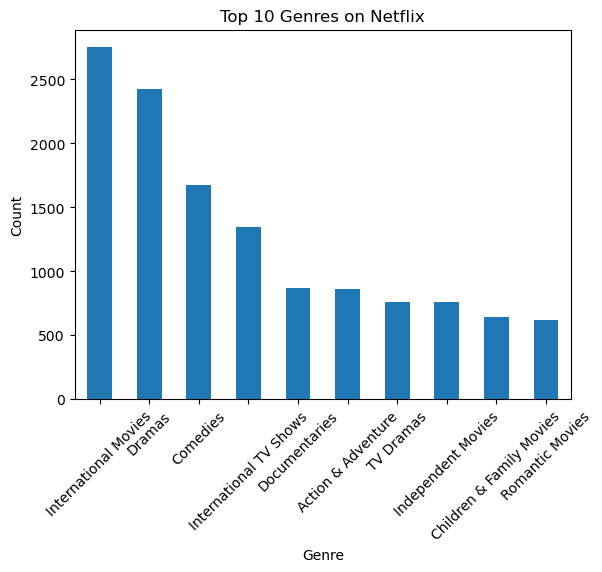

In [34]:
df_genre['listed_in'].value_counts().head(10).plot(kind='bar')

plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

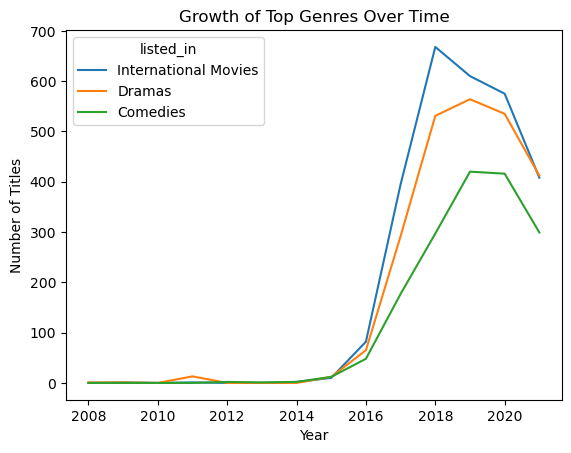

In [35]:
genre_trend = df_genre.groupby(['year_added', 'listed_in']).size().unstack().fillna(0)

genre_trend[['International Movies', 'Dramas', 'Comedies']].plot()

plt.title("Growth of Top Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()